# Ejercicio 3 - Precios de Combustible

In [1]:
import pandas as pd
import numpy as np
import requests

## Lectura de Datos

In [2]:
df =  pd.read_pickle("Precios.pickle")
df

,C.P.,Dirección,Horario,Latitud,Localidad,Longitud (WGS84),Margen,Municipio,Precio Biodiesel,Precio Bioetanol,...,Provincia,Remisión,Rótulo,Tipo Venta,% BioEtanol,% Éster metílico,IDEESS,IDMunicipio,IDProvincia,IDCCAA
0,02250,"AVENIDA CASTILLA LA MANCHA, 26",L-D: 07:00-22:00,"39,211417",ABENGIBRE,"-1,539167",D,Abengibre,,,...,ALBACETE,dm,Nº 10.935,P,"0,0","0,0",4375,52,02,07
1,02001,"CALLE FEDERICO GARCIA LORCA, 1",L-D: 24H,"39,000861",ALBACETE,"-1,849833",D,Albacete,,,...,ALBACETE,dm,PLENOIL,P,"0,0","0,0",13933,54,02,07
2,02001,"CALLE FEDERICO GARCIA LORCA, 5",L-S: 05:00-23:00,"38,997722",ALBACETE,"-1,846361",I,Albacete,,,...,ALBACETE,dm,CEPSA,R,"0,0","0,0",4438,54,02,07
3,02001,CALLE PRINCIPE DE ASTURIAS (POLÍGONO DE ROMICA...,L-D: 06:00-21:30,"39,054694",ALBACETE,"-1,832000",I,Albacete,,,...,ALBACETE,OM,BP ROMICA,P,"0,0","0,0",12054,54,02,07
4,02001,"AVENIDA 1º DE MAYO, S/N",L-S: 08:00-22:00; D: 09:00-21:00,"38,985667",ALBACETE,"-1,868500",N,Albacete,,,...,ALBACETE,dm,CARREFOUR,P,"0,0","0,0",10765,54,02,07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11311,50197,"POLIGONO CALLE TURIASO, 31",L-D: 24H,"41,645722",ZARAGOZA,"-0,974194",D,Zaragoza,,,...,ZARAGOZA,dm,NOIL,P,"0,0","0,0",13917,8108,50,02
11312,50197,"AVENIDA DIAGONAL PLAZA, 22",L-V: 06:00-22:00; S: 08:00-15:00,"41,636528",ZARAGOZA,"-0,990111",D,Zaragoza,,,...,ZARAGOZA,dm,REPSOL,P,"0,0","0,0",12289,8108,50,02
11313,50800,"CARRETERA N-330A KM. 24,000",L-D: 06:00-22:00,"41,857000",ZUERA,"-0,794000",D,Zuera,,,...,ZARAGOZA,OM,REPSOL,P,"0,0","0,0",1452,8109,50,02
11314,50800,"CALLE AUSTRIA, 11,17",L-D: 24H,"41,883583",ZUERA,"-0,782833",D,Zuera,,,...,ZARAGOZA,dm,COOPERATIVA SAN LICER,P,"0,0","0,0",9085,8109,50,02


## Exploración de datos

In [3]:
df.head(15)

,C.P.,Dirección,Horario,Latitud,Localidad,Longitud (WGS84),Margen,Municipio,Precio Biodiesel,Precio Bioetanol,...,Provincia,Remisión,Rótulo,Tipo Venta,% BioEtanol,% Éster metílico,IDEESS,IDMunicipio,IDProvincia,IDCCAA
0,02250,"AVENIDA CASTILLA LA MANCHA, 26",L-D: 07:00-22:00,"39,211417",ABENGIBRE,"-1,539167",D,Abengibre,,,...,ALBACETE,dm,Nº 10.935,P,"0,0","0,0",4375,52,02,07
1,02001,"CALLE FEDERICO GARCIA LORCA, 1",L-D: 24H,"39,000861",ALBACETE,"-1,849833",D,Albacete,,,...,ALBACETE,dm,PLENOIL,P,"0,0","0,0",13933,54,02,07
2,02001,"CALLE FEDERICO GARCIA LORCA, 5",L-S: 05:00-23:00,"38,997722",ALBACETE,"-1,846361",I,Albacete,,,...,ALBACETE,dm,CEPSA,R,"0,0","0,0",4438,54,02,07
3,02001,CALLE PRINCIPE DE ASTURIAS (POLÍGONO DE ROMICA...,L-D: 06:00-21:30,"39,054694",ALBACETE,"-1,832000",I,Albacete,,,...,ALBACETE,OM,BP ROMICA,P,"0,0","0,0",12054,54,02,07
4,02001,"AVENIDA 1º DE MAYO, S/N",L-S: 08:00-22:00; D: 09:00-21:00,"38,985667",ALBACETE,"-1,868500",N,Albacete,,,...,ALBACETE,dm,CARREFOUR,P,"0,0","0,0",10765,54,02,07
5,02005,"AVENIDA MENÉNDEZ PIDAL, 58",L-D: 24H,"39,003333",ALBACETE,"-1,864917",N,Albacete,,,...,ALBACETE,dm,TAMOS,P,"0,0","0,0",4369,54,02,07
6,02005,"AVENIDA ESCRITOR RODRIGO RUBIO, 3",L-S: 09:00-21:30,"39,006889",ALBACETE,"-1,885361",D,Albacete,,,...,ALBACETE,dm,A&A,P,"0,0","0,0",15000,54,02,07
7,02005,"CL PASEO DE LA CUBA, 15",L-D: 06:00-22:00,"38,999722",ALBACETE,"-1,854556",D,Albacete,,,...,ALBACETE,OM,REPSOL,P,"0,0","0,0",5195,54,02,07
8,02002,"CALLE HERMANOS FALCÓ, 2",L-D: 06:30-22:30,"38,989250",ALBACETE,"-1,849028",D,Albacete,,,...,ALBACETE,dm,CEPSA,P,"0,0","0,0",5313,54,02,07
9,02006,CARRETERA NACIONAL 322 PTO KM 347 KM. 347,L-S: 07:00-22:00,"38,965639",ALBACETE,"-1,935500",D,Albacete,,,...,ALBACETE,dm,P347,P,"0,0","0,0",14377,54,02,07


In [4]:
df.describe()

,C.P.,Dirección,Horario,Latitud,Localidad,Longitud (WGS84),Margen,Municipio,Precio Biodiesel,Precio Bioetanol,...,Provincia,Remisión,Rótulo,Tipo Venta,% BioEtanol,% Éster metílico,IDEESS,IDMunicipio,IDProvincia,IDCCAA
count,11316,11316,11316,11316,11316,11316,11316,11316,11316,11316,...,11316,11316,11316,11316,11316,11316,11316,11316,11316,11316
unique,4470,10999,1388,10999,4139,11090,3,3384,25,6,...,52,2,3715,2,3,6,11316,3385,52,19
top,04700,"AVENIDA ANDALUCIA, S/N",L-D: 24H,"41,672528",MADRID,"2,878639",D,Madrid,,,...,BARCELONA,dm,REPSOL,P,"0,0","0,0",4375,4354,08,01
freq,28,10,4722,3,226,3,5757,226,11279,11311,...,781,7690,2721,10616,11311,11279,1,226,781,2179


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11316 entries, 0 to 11315
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   C.P.                                11316 non-null  object
 1   Dirección                           11316 non-null  object
 2   Horario                             11316 non-null  object
 3   Latitud                             11316 non-null  object
 4   Localidad                           11316 non-null  object
 5   Longitud (WGS84)                    11316 non-null  object
 6   Margen                              11316 non-null  object
 7   Municipio                           11316 non-null  object
 8   Precio Biodiesel                    11316 non-null  object
 9   Precio Bioetanol                    11316 non-null  object
 10  Precio Gas Natural Comprimido       11316 non-null  object
 11  Precio Gas Natural Licuado          11316 non-null  ob

In [6]:
df.tail()

,C.P.,Dirección,Horario,Latitud,Localidad,Longitud (WGS84),Margen,Municipio,Precio Biodiesel,Precio Bioetanol,...,Provincia,Remisión,Rótulo,Tipo Venta,% BioEtanol,% Éster metílico,IDEESS,IDMunicipio,IDProvincia,IDCCAA
11311,50197,"POLIGONO CALLE TURIASO, 31",L-D: 24H,"41,645722",ZARAGOZA,"-0,974194",D,Zaragoza,,,...,ZARAGOZA,dm,NOIL,P,"0,0","0,0",13917,8108,50,02
11312,50197,"AVENIDA DIAGONAL PLAZA, 22",L-V: 06:00-22:00; S: 08:00-15:00,"41,636528",ZARAGOZA,"-0,990111",D,Zaragoza,,,...,ZARAGOZA,dm,REPSOL,P,"0,0","0,0",12289,8108,50,02
11313,50800,"CARRETERA N-330A KM. 24,000",L-D: 06:00-22:00,"41,857000",ZUERA,"-0,794000",D,Zuera,,,...,ZARAGOZA,OM,REPSOL,P,"0,0","0,0",1452,8109,50,02
11314,50800,"CALLE AUSTRIA, 11,17",L-D: 24H,"41,883583",ZUERA,"-0,782833",D,Zuera,,,...,ZARAGOZA,dm,COOPERATIVA SAN LICER,P,"0,0","0,0",9085,8109,50,02
11315,50810,"CALLE COOPERATIVA, 2",L-D: 24H,"41,938750",ONTINAR DE SALZ,"-0,757611",D,Zuera,,,...,ZARAGOZA,dm,COOPERATIVA SAN ISIDRO,P,"0,0","0,0",9068,8109,50,02


## Limpieza

In [7]:
comunidades = {
        '01': 'Andalucia',
        '02': 'Aragón',
        '03': 'Asturias',
        '04': 'Baleares',
        '05': 'Canarias',
        '06': 'Cantabria',
        '07': 'Castilla la Mancha',
        '08': 'Castilla y León',
        '09': 'Cataluña',
        '10': 'Comunidad Valenciana',
        '11': 'Extremadura',
        '12': 'Galicia',
        '13': 'Madrid',
        '14': 'Murcia',
        '15': 'Navarra',
        '16': 'Pais Vasco',
        '17': 'La Rioja',
        '18': 'Ceuta',
        '19': 'Melilla'
    }

def asigna_comunidad(idccaa):
    return comunidades.get(idccaa, "NA")

df_final = df \
        .drop(columns = ['Remisión','Dirección','Horario','Rótulo','Tipo Venta','% BioEtanol', '% Éster metílico', 'Margen']) \
        .rename(columns={'C.P.': 'CodPos', 'Longitud (WGS84)' : 'Longitud'}) \
        .melt(id_vars = ['IDEESS','IDCCAA','IDMunicipio','Municipio','IDProvincia','Provincia','Localidad','CodPos','Latitud','Longitud'],
                 var_name = "TipoPrecio",
                 value_name = "Precio") \
        .assign(
            CCAA = lambda dataset: dataset.IDCCAA.map(asigna_comunidad),
            Precio = lambda dataset: dataset.Precio.replace('',np.NaN),
            ) \
        .reindex(columns = ['IDEESS','IDCCAA','IDMunicipio','Municipio','IDProvincia','Provincia','Localidad','CodPos','Latitud','Longitud','CCAA','TipoPrecio','Precio']) \
        .assign(
            Precio = lambda dataset : dataset.Precio.str.replace(",", ".").astype("float"),
            Longitud = lambda dataset : dataset.Longitud.str.replace(",", ".").astype("float"),
            Latitud = lambda dataset : dataset.Latitud.str.replace(",", ".").astype("float")
            ) \
        .dropna()
       

df_final.head()

,IDEESS,IDCCAA,IDMunicipio,Municipio,IDProvincia,Provincia,Localidad,CodPos,Latitud,Longitud,CCAA,TipoPrecio,Precio
222,3731,10,152,Alicante/Alacant,03,ALICANTE,ALICANTE/ALACANT,03008,38.335694,-0.512833,Comunidad Valenciana,Precio Biodiesel,1.378
825,16,16,7,Arrazua-Ubarrundia,01,ARABA/ÁLAVA,ZURBANO,01520,42.876861,-2.616361,Pais Vasco,Precio Biodiesel,1.459
847,11651,16,39,Ribera Baja/Erribera Beitia,01,ARABA/ÁLAVA,RIBABELLOSA,01213,42.692917,-2.920667,Pais Vasco,Precio Biodiesel,1.229
860,12416,16,46,Vitoria-Gasteiz,01,ARABA/ÁLAVA,VITORIA-GASTEIZ,01010,42.863778,-2.712722,Pais Vasco,Precio Biodiesel,1.539
1146,4919,08,396,Barco de Ávila (El),05,ÁVILA,BARCO DE AVILA (EL),05600,40.358500,-5.516528,Castilla y León,Precio Biodiesel,1.419


## Verificación de datos

In [8]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39326 entries, 222 to 147105
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IDEESS       39326 non-null  object 
 1   IDCCAA       39326 non-null  object 
 2   IDMunicipio  39326 non-null  object 
 3   Municipio    39326 non-null  object 
 4   IDProvincia  39326 non-null  object 
 5   Provincia    39326 non-null  object 
 6   Localidad    39326 non-null  object 
 7   CodPos       39326 non-null  object 
 8   Latitud      39326 non-null  float64
 9   Longitud     39326 non-null  float64
 10  CCAA         39326 non-null  object 
 11  TipoPrecio   39326 non-null  object 
 12  Precio       39326 non-null  float64
dtypes: float64(3), object(10)
memory usage: 4.2+ MB


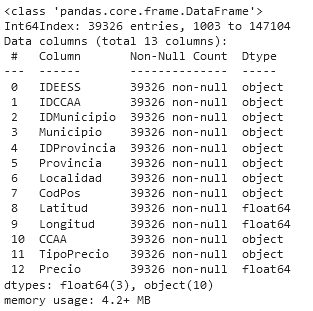

In [9]:
df_final.query("IDEESS == '14187'")

,IDEESS,IDCCAA,IDMunicipio,Municipio,IDProvincia,Provincia,Localidad,CodPos,Latitud,Longitud,CCAA,TipoPrecio,Precio
61557,14187,01,2786,Motril,18,GRANADA,MOTRIL,18600,36.770722,-3.55725,Andalucia,Precio Gasoleo A,1.409
84189,14187,01,2786,Motril,18,GRANADA,MOTRIL,18600,36.770722,-3.55725,Andalucia,Precio Gasoleo Premium,1.475
106821,14187,01,2786,Motril,18,GRANADA,MOTRIL,18600,36.770722,-3.55725,Andalucia,Precio Gasolina 95 E5,1.534
118137,14187,01,2786,Motril,18,GRANADA,MOTRIL,18600,36.770722,-3.55725,Andalucia,Precio Gasolina 95 E5 Premium,1.594
140769,14187,01,2786,Motril,18,GRANADA,MOTRIL,18600,36.770722,-3.55725,Andalucia,Precio Gasolina 98 E5,1.666


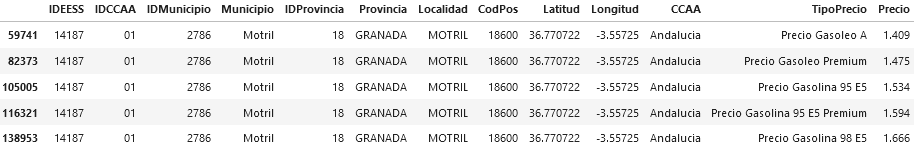

In [10]:
df_final.TipoPrecio.value_counts()

Precio Gasoleo A                      10989
Precio Gasolina 95 E5                 10310
Precio Gasoleo Premium                 7386
Precio Gasolina 98 E5                  6000
Precio Gasoleo B                       2946
Precio Gases licuados del petróleo      771
Precio Gasolina 95 E5 Premium           695
Precio Gas Natural Comprimido           104
Precio Gas Natural Licuado               69
Precio Biodiesel                         37
Precio Gasolina 95 E10                    9
Precio Bioetanol                          5
Precio Gasolina 98 E10                    5
Name: TipoPrecio, dtype: int64

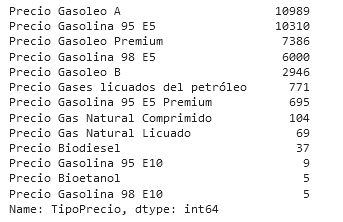

In [11]:
df_final.describe(include = 'all') 

,IDEESS,IDCCAA,IDMunicipio,Municipio,IDProvincia,Provincia,Localidad,CodPos,Latitud,Longitud,CCAA,TipoPrecio,Precio
count,39326,39326,39326,39326,39326,39326,39326,39326,39326.000000,39326.000000,39326,39326,39326.000000
unique,11316,19,3385,3384,52,52,4139,4470,NaN,NaN,19,13,NaN
top,15083,01,4354,Madrid,28,MADRID,MADRID,04700,NaN,NaN,Andalucia,Precio Gasoleo A,NaN
freq,8,7434,828,828,2816,2816,828,95,NaN,NaN,7434,10989,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.603484,-3.378921,NaN,NaN,1.427578
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.163976,3.976479,NaN,NaN,0.208070
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.705333,-18.011944,NaN,NaN,0.562000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.000000,-5.476694,NaN,NaN,1.379000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.105333,-3.496083,NaN,NaN,1.465000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.722222,-0.656160,NaN,NaN,1.549000


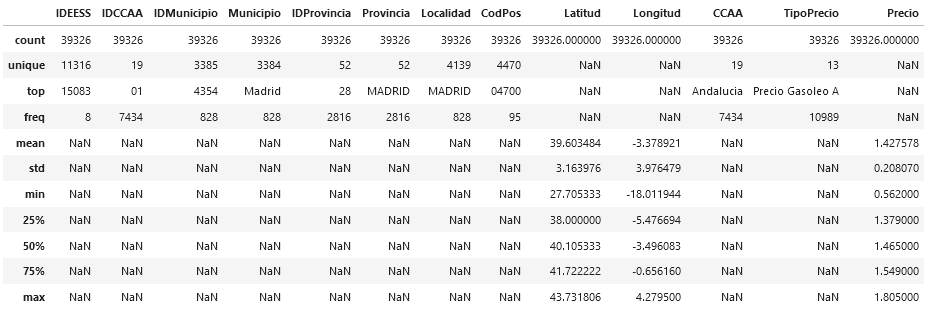

In [12]:
(df_final 
   .groupby(["CCAA", "TipoPrecio"], as_index = False).agg({ "Precio" : "mean" }) 
   .pivot(index = "CCAA", columns = "TipoPrecio", values = "Precio") 
   .reset_index() 
   .rename_axis(columns = None) 
   .filter(["CCAA", "Precio Gasoleo A", "Precio Gasolina 98 E5"]) 
   .query("CCAA.str.startswith('C')", engine = "python")
)

,CCAA,Precio Gasoleo A,Precio Gasolina 98 E5
4,Canarias,1.101132,1.291938
5,Cantabria,1.395211,1.667385
6,Castilla la Mancha,1.381695,1.648551
7,Castilla y León,1.401191,1.669672
8,Cataluña,1.383045,1.685567
9,Ceuta,1.143500,1.273667
10,Comunidad Valenciana,1.370705,1.659703


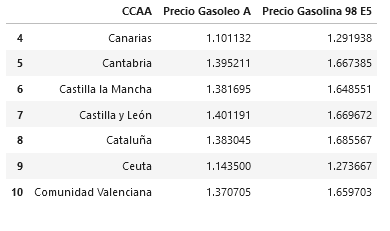